In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
X_train = pd.read_csv('Logistic_X_Train.csv').values
print(X_train)


[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 ...
 [ 0.08827657  1.63878904 -2.19364056]
 [ 1.52515501  0.85923429  1.50530791]
 [-0.97981744  0.56395376 -1.53939416]]


In [3]:
Y_train = pd.read_csv('Logistic_Y_Train.csv').values
Y_train = Y_train.flatten()

In [4]:
print(X_train.shape,Y_train.shape)

(3000, 3) (3000,)


## Normalisation and standardisation of dataset

In [8]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-mean)/std
print(X_train)

[[-0.93471307 -0.24439694 -0.46140414]
 [-0.7823013  -0.19327286 -1.08586573]
 [-0.46707053  0.56681072 -1.17534766]
 ...
 [ 0.06059095  0.62470809 -1.83827342]
 [ 1.13777964 -0.13681202  1.22033571]
 [-0.74013008 -0.42526137 -1.29728616]]


## Implementing Logistic Regression Algorithm

In [35]:
def hypothesis(x,w,b):
    hx = np.dot(x,w) + b
    return sigmoid(hx)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    err = 0.0
    m=x.shape[0]
    for i in range(m):
        hy = hypothesis(x[i],w,b)
        err += y_true[i]*np.log2(hy) + (1-y_true[i])*np.log2(1-hy)
    
    return -err/m

## get best parameter values
def getGrad(y_true,x,w,b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    m = x.shape[0]
    
    for i in range(m):
        hy = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i]-hy)*x[i]
        grad_b += (y_true[i] - hy)
        
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


def GradientDescent(x,y_true,w,b,learning_rate=0.1):
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = getGrad(y_true,x,w,b)
    
    w += learning_rate*grad_w
    b += learning_rate*grad_b
    
    return err,w,b

In [36]:
loss = []
acc = []
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [48]:
X_test  = pd.read_csv('Logistic_X_Test.csv').values

u = X_test.mean(axis=0)
sigma = X_test.std(axis=0)
X_test = (X_test-u)/sigma

In [49]:
for i in range(200):
    l,wt,bs = GradientDescent(X_train,Y_train,W,b,learning_rate = 0.5)
    loss.append(l)
print(wt)
print(bs)

[-4.12511786  2.91566348 -3.03612601]
0.19233022342426853


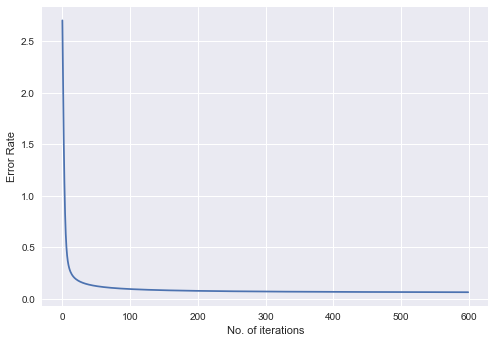

In [50]:
plt.style.use('seaborn')
plt.plot(loss)
plt.xlabel('No. of iterations')
plt.ylabel('Error Rate')
plt.show()

In [51]:
Y_pred = hypothesis(X_test,wt,bs)
print(Y_pred.shape)
pred =[]
for i in range(Y_pred.shape[0]):
    if (Y_pred[i] >= 0.5):
        pred.append(1)
    else:
        pred.append(0)

print(pred)

(1000,)
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1

In [52]:
newdf = pd.DataFrame(data=pred,columns=['label'])
newdf.to_csv('Final.csv',index=False)